# BIVE, VINCE EMMANUEL
# PRELIM EXAM

In [1]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Data Gathering - Import dataset
import pandas as pd
passenger = pd.read_csv('train_3.csv') #Calling the training data
passenger_test = pd.read_csv('test_3.csv')

In [3]:
#Preparing the Data
passenger.isnull().sum() #Checking NaN Contents in the DataSet

Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Pclass        0
Adult       177
Alone         0
Survived      0
dtype: int64

In [4]:
#Replacing NaN values with the mean of the age range
passenger.loc[:, 'Age'].fillna(passenger.loc[:, 'Age'].mean(), inplace=True)
passenger.isnull().sum()

Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      2
Pclass        0
Adult       177
Alone         0
Survived      0
dtype: int64

In [5]:
#Remove NaN values in Embarked
passenger_new = passenger.dropna(subset=['Embarked'])
passenger_new

,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass,Adult,Alone,Survived
0,1,22.000000,1,0,7.2500,3.0,3,1.0,0,0
1,0,38.000000,1,0,71.2833,2.0,1,1.0,0,1
2,0,26.000000,0,0,7.9250,3.0,3,1.0,1,1
3,0,35.000000,1,0,53.1000,3.0,1,1.0,0,1
4,1,35.000000,0,0,8.0500,3.0,3,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...
886,1,27.000000,0,0,13.0000,3.0,2,1.0,1,0
887,0,19.000000,0,0,30.0000,3.0,1,1.0,1,1
888,0,29.699118,1,2,23.4500,3.0,3,NaN,0,0
889,1,26.000000,0,0,30.0000,2.0,1,1.0,1,1


In [6]:
#Check for further null values
passenger_new.isnull().sum()

Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Pclass        0
Adult       177
Alone         0
Survived      0
dtype: int64

In [7]:
#Identify input and output variables
x_var = passenger_new.loc[:, ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'Fare']] #Input Variables
y_var = passenger_new.loc[:, 'Survived'] # Survived

In [8]:
#Split train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_var, y_var, test_size = 0.2)

# MACHINE LEARNING ALGORITHM 1 - DECISION TREE CLASSIFICATION

In [9]:
# Choose a machine learning algorithm
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
model_DTC = DecisionTreeClassifier()

In [10]:
#Train the Model
model_DTC.fit(x_train, y_train)

DecisionTreeClassifier()

In [44]:
#Prediction - Test the model
pred_DTC1 = model_DTC.predict(x_test)
pred_DTC1

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1], dtype=int64)

In [45]:
#Check for accuracy
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_test, pred_DTC1))

Accuracy: 0.7696629213483146


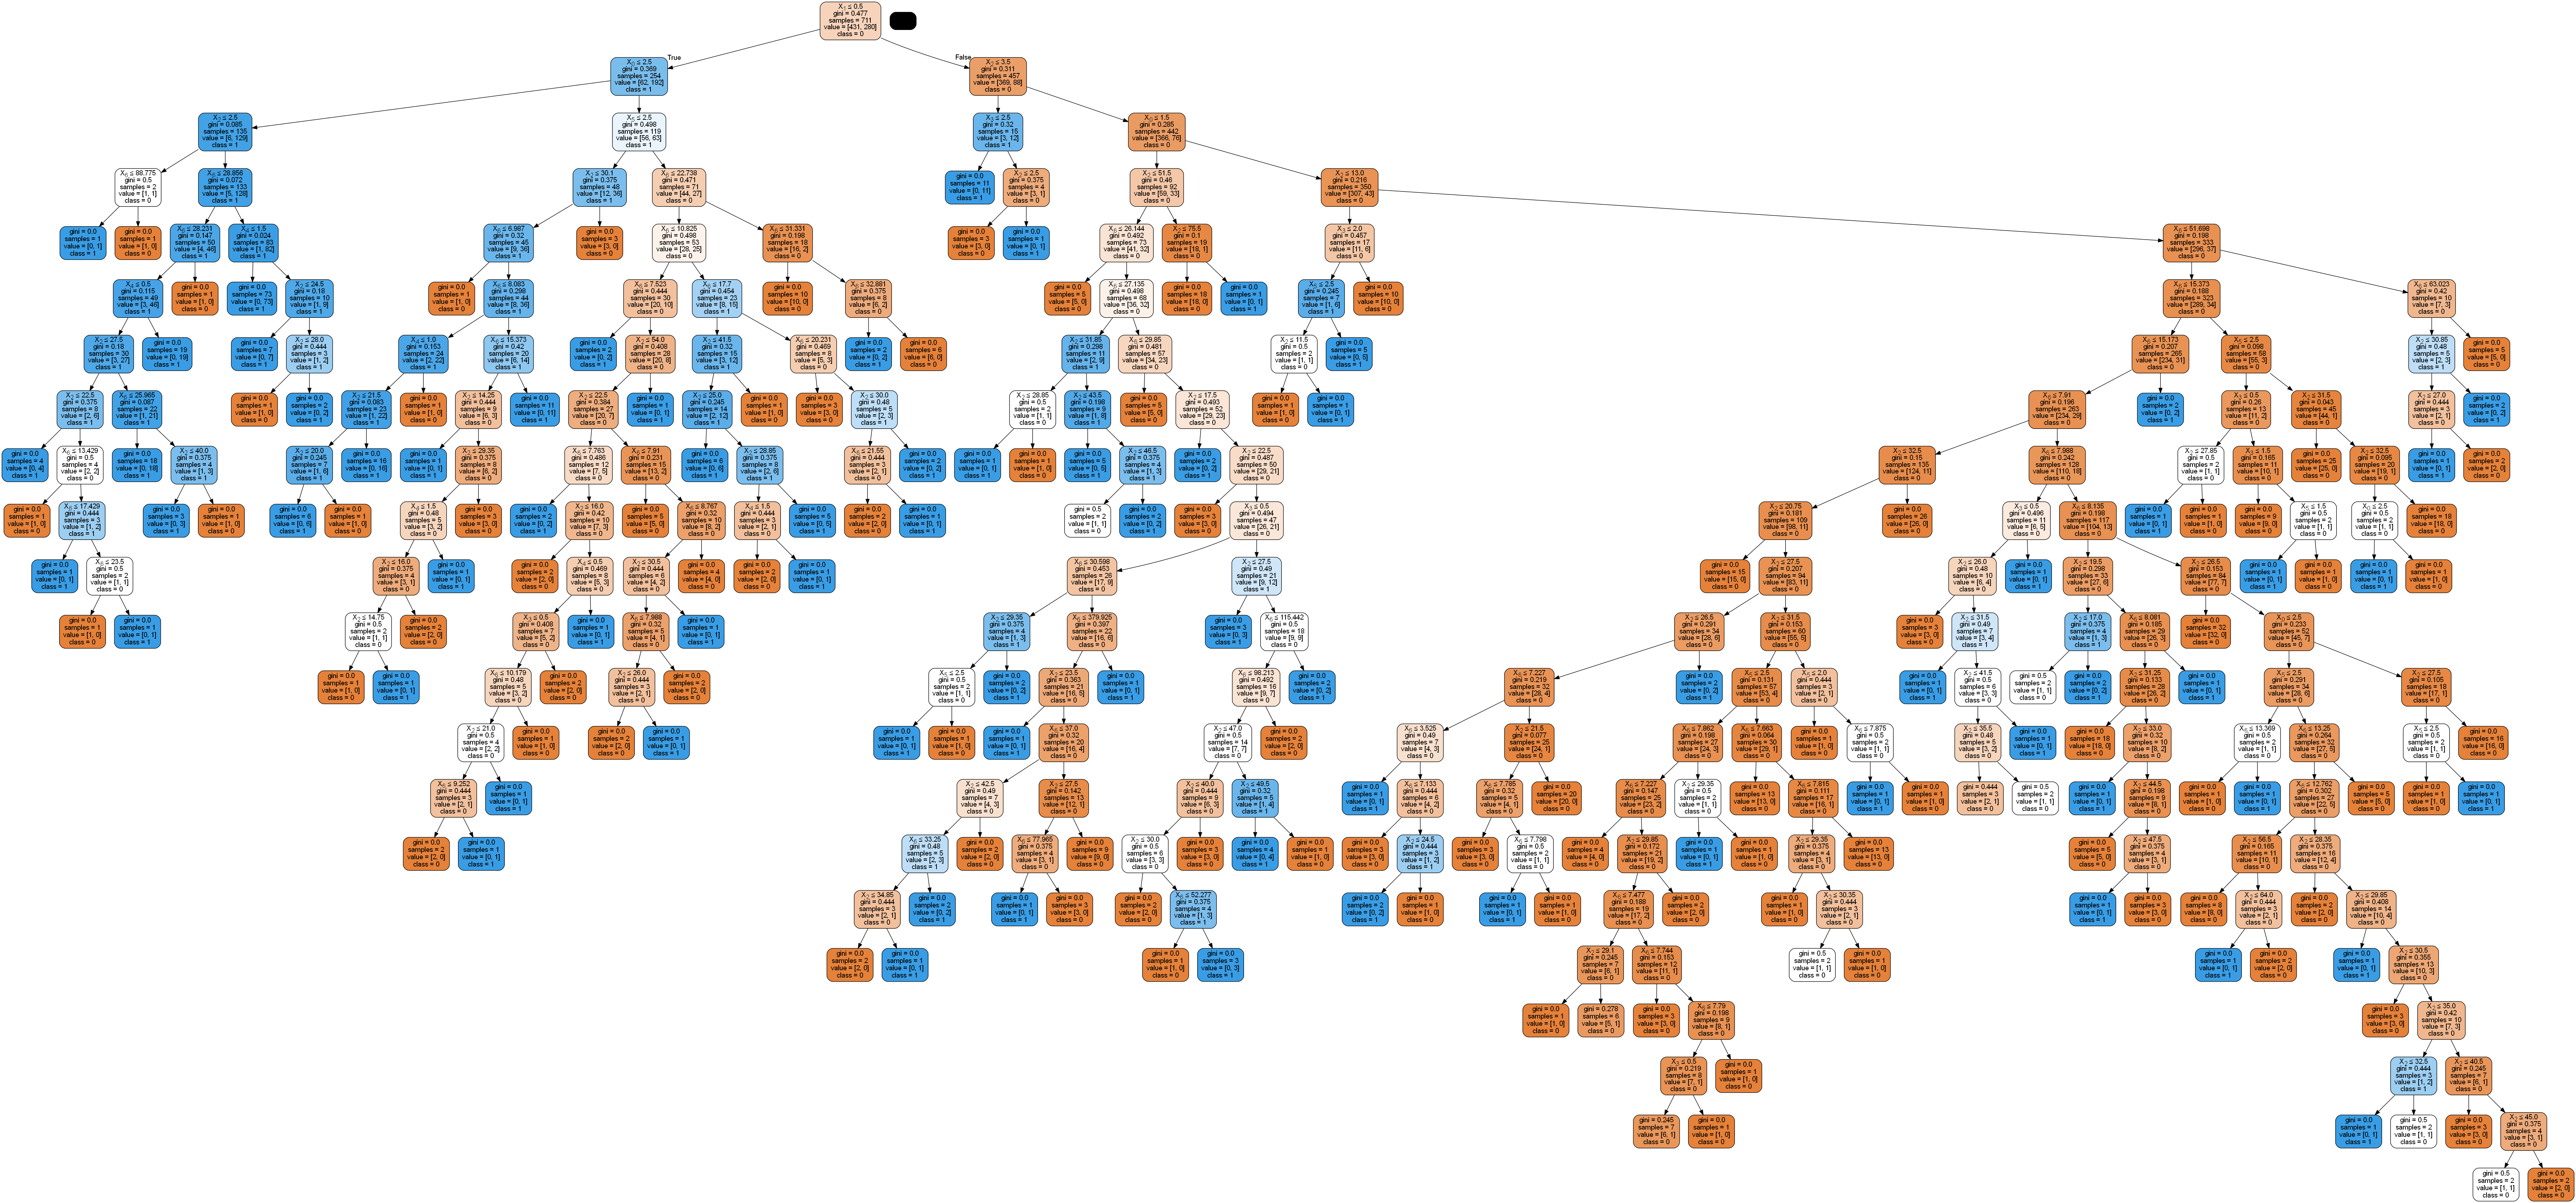

In [46]:
#Plot decision trees diagram
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(model_DTC, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic.png')
Image(graph.create_png())

In [48]:
# Check accuracy once again
model_DTC2 = DecisionTreeClassifier(criterion="entropy", max_depth=7)

# Train Decision Tree Classifer
model_DTC2 = model_DTC2.fit(x_train, y_train)

#Predict the possibility of survival
pred_DTC1 = model_DTC2.predict(x_test)

# Print for Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, pred_DTC1))

Accuracy: 0.8258426966292135


# MACHINE LEARNING ALGORITHM 2 - LOGISTIC REGRESSION

In [15]:
#Choose a machine learning algorithm 2
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()

In [16]:
#Train the Model
model_LR.fit(x_train, y_train)

C:\Users\Bive\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
#Test the prediction of the Machine Learning Algorithm
pred2 = model_LR.predict(x_test)
pred2

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1], dtype=int64)

In [22]:
#Check Accuracy
model_LR.score(x_test, y_test)

0.797752808988764

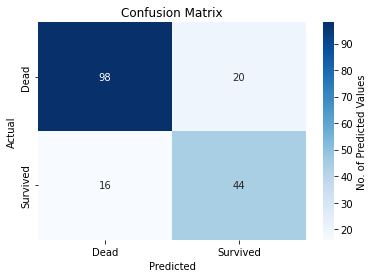

In [23]:
#Plot Confusion Matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred2)
sns.heatmap(cm, cmap="Blues", annot=True, cbar_kws = {"label":"No. of Predicted Values"},
                                          xticklabels=['Dead','Survived'], yticklabels=['Dead','Survived'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# NEURAL NETWORK

In [27]:
#Choosing an algorithm - Neural Network
from keras import Sequential
from keras.layers import Dense
model_nn = Sequential()
model_nn.add(Dense(15, input_dim = 7, activation = 'relu'))
model_nn.add(Dense(45, activation = 'relu'))
model_nn.add(Dense(30, activation = 'relu'))
model_nn.add(Dense(12, activation = 'relu'))
model_nn.add(Dense(7, activation = 'relu'))
model_nn.add(Dense(1, activation = 'sigmoid'))

In [28]:
#Compile Model
model_nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [29]:
#Train neural network
model_nn.fit(x_var, y_var, epochs = 50, batch_size = 5)

Epoch 1/50
178/178 [==============================] - 5s 5ms/step - loss: 0.6624 - accuracy: 0.6625
Epoch 2/50
178/178 [==============================] - 1s 6ms/step - loss: 0.6164 - accuracy: 0.6862
Epoch 3/50
178/178 [==============================] - 1s 6ms/step - loss: 0.5724 - accuracy: 0.7143
Epoch 4/50
178/178 [==============================] - 2s 10ms/step - loss: 0.5372 - accuracy: 0.7210
Epoch 5/50
178/178 [==============================] - 1s 7ms/step - loss: 0.5273 - accuracy: 0.7627
Epoch 6/50
178/178 [==============================] - 1s 7ms/step - loss: 0.5185 - accuracy: 0.7559
Epoch 7/50
178/178 [==============================] - 1s 7ms/step - loss: 0.4855 - accuracy: 0.7807
Epoch 8/50
178/178 [==============================] - 1s 7ms/step - loss: 0.4767 - accuracy: 0.8031
Epoch 9/50
178/178 [==============================] - 2s 12ms/step - loss: 0.4753 - accuracy: 0.8076
Epoch 10/50
178/178 [==============================] - 2s 9ms/step - loss: 0.4785 - accuracy: 0.78

In [49]:
#Check Accuracy
model_nn.evaluate(x_var, y_var)

28/28 [==============================] - 0s 4ms/step - loss: 0.3916 - accuracy: 0.8301


[0.3915652334690094, 0.8301462531089783]

In [34]:
#Display info about the defined model
model_nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 15)                120       
                                                                 
 dense_7 (Dense)             (None, 45)                720       
                                                                 
 dense_8 (Dense)             (None, 30)                1380      
                                                                 
 dense_9 (Dense)             (None, 12)                372       
                                                                 
 dense_10 (Dense)            (None, 7)                 91        
                                                                 
 dense_11 (Dense)            (None, 1)                 8         
                                                                 
Total params: 2,691
Trainable params: 2,691
Non-traina

In [36]:
#Test neural network
model_nn.predict(x_test)

6/6 [==============================] - 0s 6ms/step


array([[0.07926904],
       [0.17363654],
       [0.13078332],
       [0.43934965],
       [0.61037856],
       [0.8508042 ],
       [0.36261123],
       [0.11590804],
       [0.12327915],
       [0.9351859 ],
       [0.98614115],
       [0.19559751],
       [0.97357666],
       [0.12313484],
       [0.99726176],
       [0.18884292],
       [0.15822676],
       [0.21502973],
       [0.66769207],
       [0.06623529],
       [0.16415487],
       [0.3753932 ],
       [0.97016406],
       [0.94992656],
       [0.41370422],
       [0.9175493 ],
       [0.10359111],
       [0.9776591 ],
       [0.32018796],
       [0.50708777],
       [0.31215218],
       [0.41361758],
       [0.14885011],
       [0.95900273],
       [0.12447029],
       [0.65300274],
       [0.18957824],
       [0.9351859 ],
       [0.34877673],
       [0.4372307 ],
       [0.6523236 ],
       [0.90261745],
       [0.13501918],
       [0.9900786 ],
       [0.44524232],
       [0.11929169],
       [0.15678489],
       [0.141

# COMPARISON

Decision Tree and Logistic Regression algorithms are both under supervised learning. The main difference between the two, is that Logistic Regression is good at classifying two possible outcomes. Decision Tree, however, uses maps of decisions to come up with a predicted value. Meanwhile, Neural Network is a type of Machine Learning Algorithm that is more advanced since it uses hidden layers to allow data transformation. 

# ANALYSIS

The dataset input variables focused on the age, gender, passenger class, fare, and number of people they are with onboard. While, survived values were the output. This is the way to clean and make the data much efficient.

Upon observing the performance of the three algorithms with the prediction of survival in titanic, it was able to come up with good enough results. Decision Trees comes up with 82.58% accuracy after using the decision tree codes, overcoming the 76.9% accuracy. For Logistic Regression, a 79.77% accuracy was achieved, and it has proven that most results of the prediction are in True Positive and True Negative, making the model good, but can still be improved. Lastly, for the Neural Network, where Sequential model was used, 6 hidden layers were applied for transforming the data during training. Finally after getting the accuracy, a value of 83.01% were produced by the model. 

After running all the codes, it can be stated that these models can further be improved by getting a dataset with complete and accurate data.

# CONCLUSION

Machine learning algorithms have different uses and functions. These algorithms can produce accurate data is cleaned properly, and the program is constructed well. All of the algorithms were able to achieve the required accuracies, but it does not mean that these created models are limited to that, as it can be improved with further study.